In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Boston_Dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
'''
The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
'''

## EDA

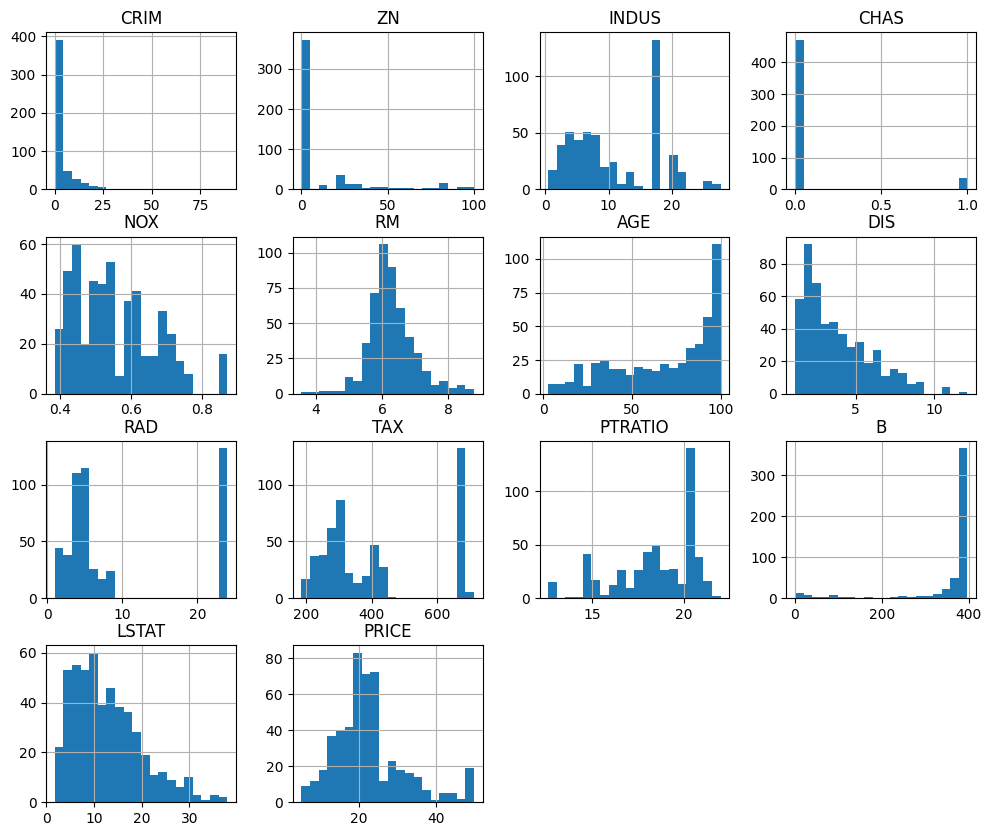

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

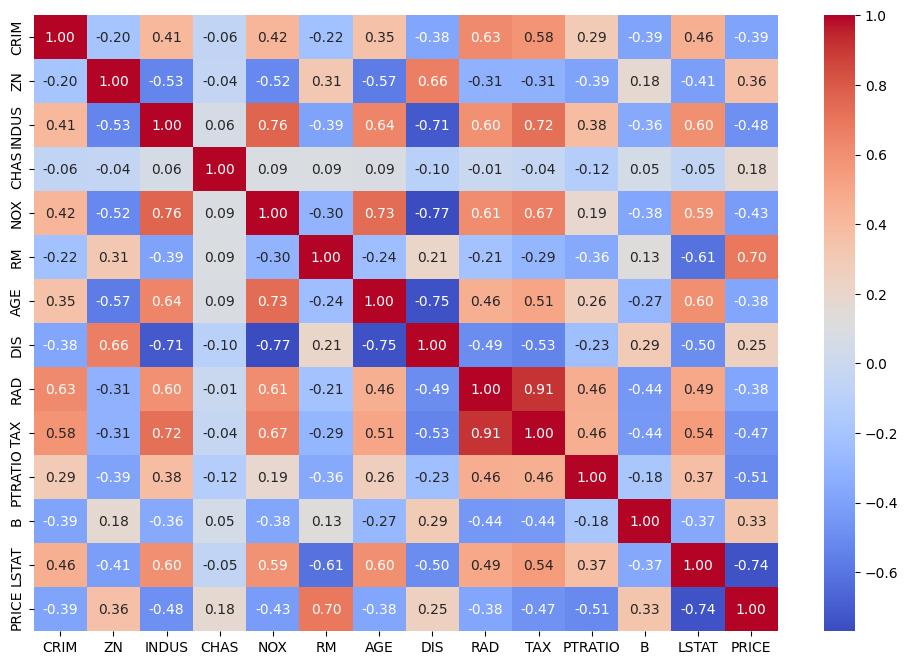

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

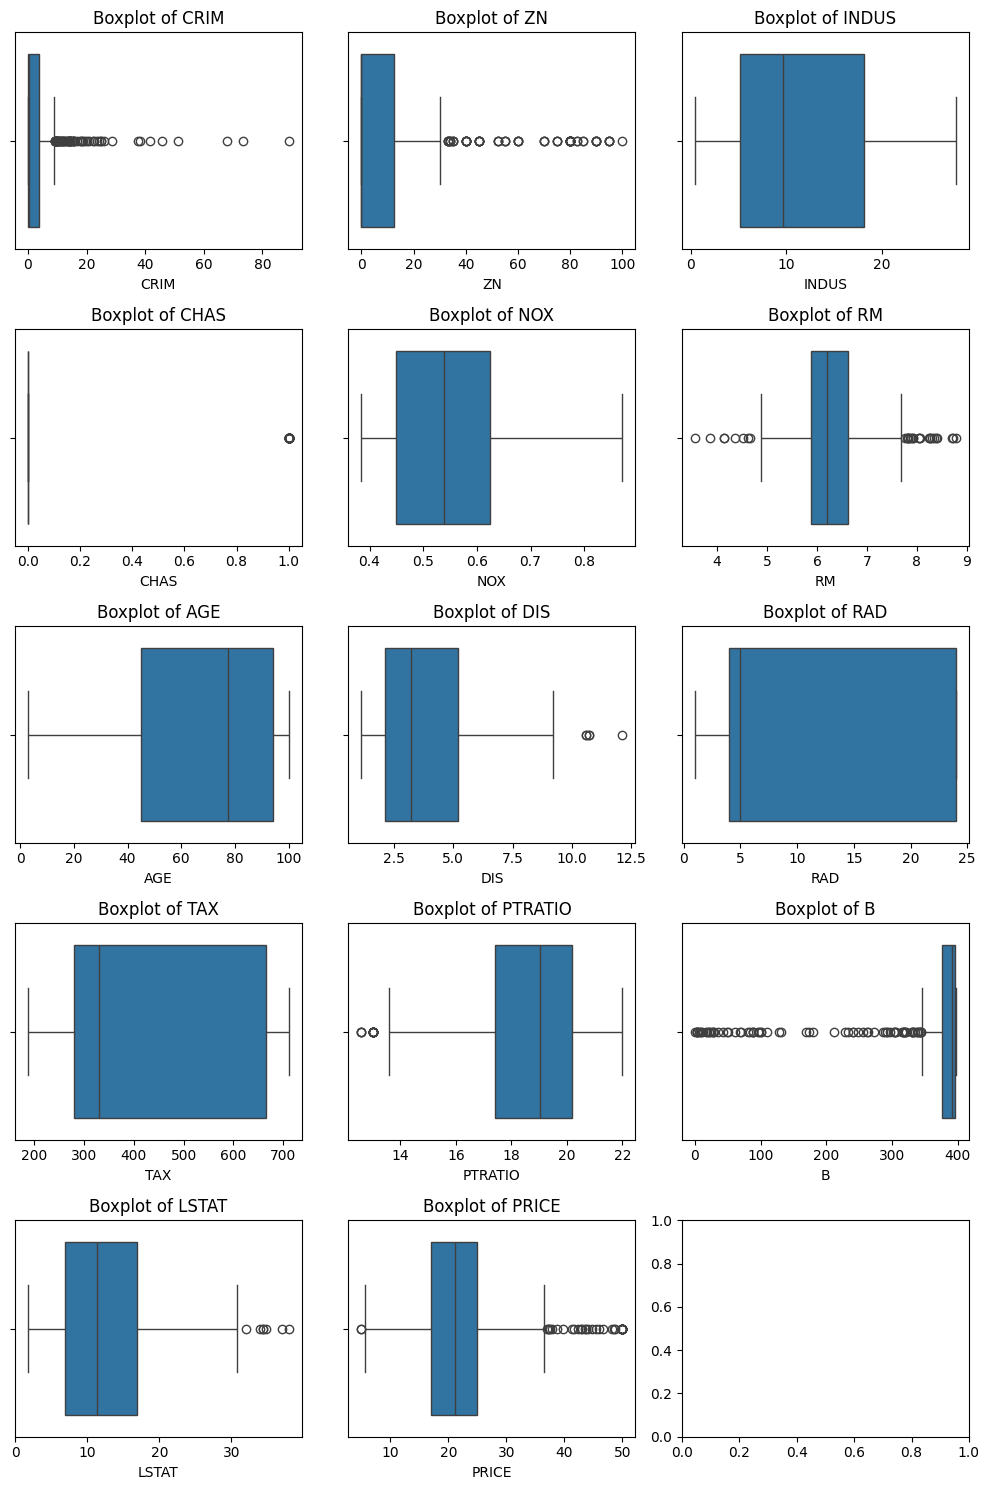

In [ ]:
# check for outliers
num_cols = df.columns
num_features = len(num_cols)

fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(10, 3*(num_features // 3 + 1)))
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easy iteration

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()

In [ ]:
''' I DECIDE TO DROP RAD, CHAS, B AND ZN
why?
  -> RAD:
        Extremely high correlation with TAX
        can cause multicollinearity

  -> CHAS:
        Low correlation with PRICE.
        is imbalanced. Will mostly ignore the positive class

   -> B:
        Low correlation with PRICE.
        A lot of outliers.

   -> ZN:
        Low correlation with PRICE.
        Large number of outiers
'''

In [ ]:
df = df.drop(columns=['RAD', 'CHAS', 'B', 'ZN'])

In [ ]:
# for simplicity lets just drop all outliers
import numpy as np

df_no_outliers = df.copy()


num_cols = df_no_outliers.columns

# initialize a mask that will remain True for rows that are NOT outliers
mask = np.ones(len(df_no_outliers), dtype=bool)


for col in num_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update mask to False if row is outside the bounds for this column
    mask &= (df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)


df_no_outliers = df_no_outliers[mask]
print("Original shape:", df.shape)
print("Shape after dropping outliers:", df_no_outliers.shape)


Original shape: (506, 10)
Shape after dropping outliers: (385, 10)


In [ ]:
# !pip install scipy

Skewness Values:
 CRIM       5.207652
INDUS      0.294146
NOX        0.727144
RM         0.402415
AGE       -0.597186
DIS        1.008779
TAX        0.667968
PTRATIO   -0.799945
LSTAT      0.903771
PRICE      1.104811
dtype: float64


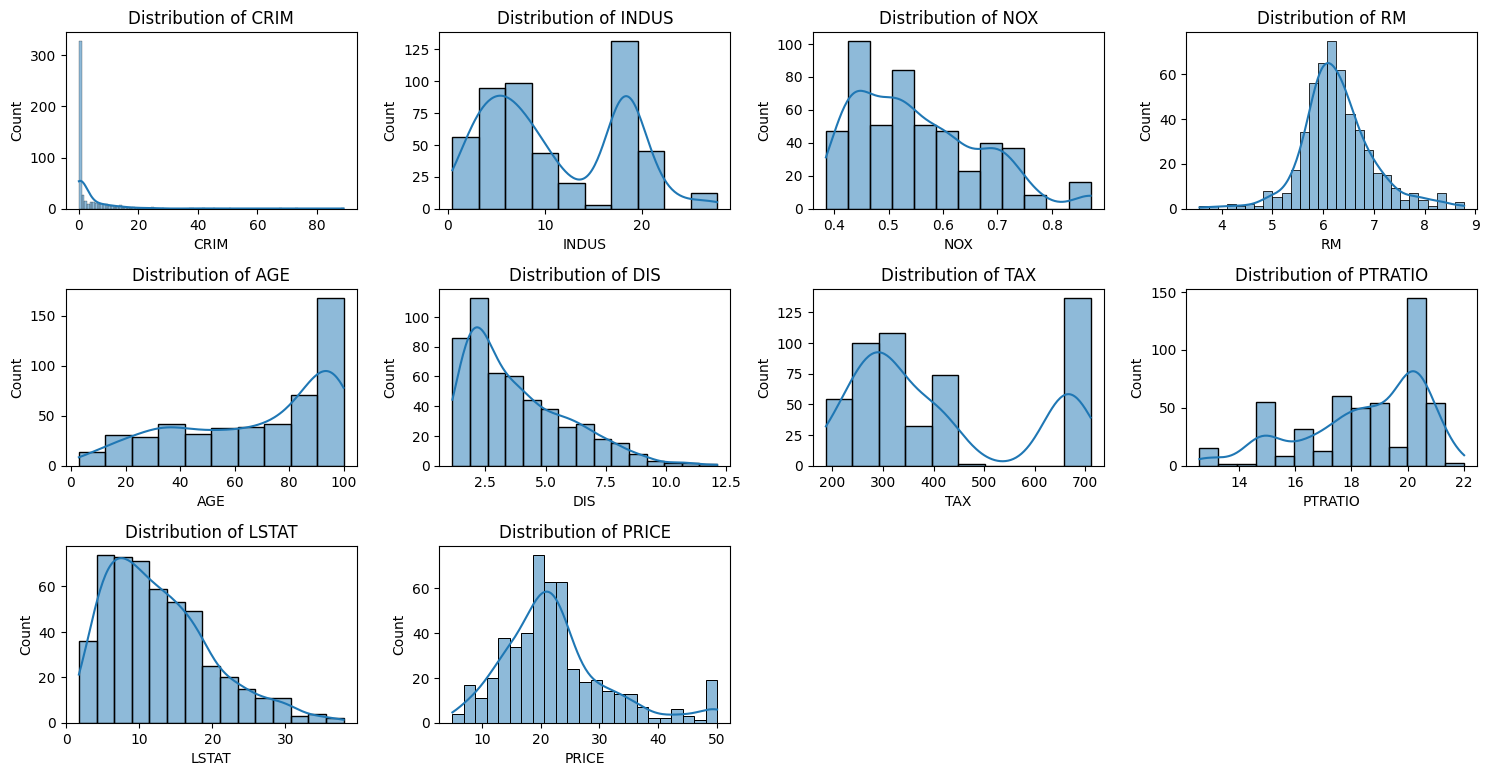

In [ ]:
## also the data is not normally distributed and linear regression expects normal distribution
## to decide which columns to standardize, i'll check skewness of each
## if skewness>0.5, we apply standardization

from scipy.stats import skew

# check skewness to decide
skew_values = df.apply(skew)
print("Skewness Values:\n", skew_values)

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()


In [ ]:
# !pip install scikit-learn

In [ ]:
## standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_standardize = ['CRIM',  'NOX','AGE', 'TAX', 'LSTAT', 'PTRATIO','DIS']
df_no_outliers[columns_to_standardize] = scaler.fit_transform(df_no_outliers[columns_to_standardize])

In [ ]:
X = df_no_outliers.drop('PRICE', axis=1)
y = df_no_outliers['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import  r2_score
import numpy as np

y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
mre = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Relative Error (MRE): {mre:.2f}%")

R² Score: 0.7423
Mean Relative Error (MRE): 10.75%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
r2 = r2_score(y_test, y_pred)
mean_relative_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R² Score: {r2:.4f}")
print(f"Mean Relative Error: {mean_relative_error:.2f}%")

R² Score: 0.7590
Mean Relative Error: 9.75%


In [ ]:
df_no_outliers.to_csv('cleaned.csv', index=False)

## Wave Data

In [5]:
# !pip install mglearn

In [7]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples=385) # lets take same sample size

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=2)

In [8]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
r2 = r2_score(y_test, y_pred)
mean_relative_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"KNN R² Score: {r2:.4f}")
print(f"KNN Mean Relative Error: {mean_relative_error:.2f}%")

KNN R² Score: 0.7299
KNN Mean Relative Error: 104.24%


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"Linear Reg R² Score: {r2:.4f}")
mre = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Linear Reg Mean Relative Error (MRE): {mre:.2f}%")

Linear Reg R² Score: 0.6501
Linear Reg Mean Relative Error (MRE): 132.95%


## Q5 : Analayze with k 1, 3, 9